In [1]:
import tensorflow as tf
from tensorflow.keras import optimizers
from pre_experiment1.encodeDecode1024 import EncodeDecode1024
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [5]:
model = EncodeDecode1024()

In [6]:
model.load_weights(r'E:\stuCode\diqiuData\npData\data1024\data3\weights2\modelWeights-60')

In [ ]:
x_test = np.load(r'E:\stuCode\diqiuData\npData\data1024\data3\x_test.npy')
y_test = np.load(r'E:\stuCode\diqiuData\npData\data1024\data3\y_test.npy')

In [8]:
x_test.shape

(173, 33, 1024)

In [9]:
x_test = np.delete(x_test, 16, axis=1)

In [7]:
x_test.shape

(173, 32, 1024)

In [9]:
x_test_1 = x_test[0:4]
y_test_1 = y_test[0:4]

In [10]:
x_test_1 = tf.cast(x_test_1, dtype=tf.float32)

In [11]:
x_test_1.shape

TensorShape([4, 32, 1024])

In [12]:
x_test_1 = tf.transpose(x_test_1,[0,2,1])

In [13]:
x_test_1 = tf.reshape(x_test_1,(4,1024,32,1))

In [14]:
y_test_1 = tf.cast(y_test_1, dtype=tf.int32)
y_test_1 = tf.one_hot(y_test_1,axis=-1,depth=2)

In [18]:
y_pred_1,x,x1,x2,x3,x4,x5,x7,x8,x9,x10,x11,x12,x13 = model(x_test_1)

In [19]:
y_pred_arg_1 = tf.argmax(y_pred_1,-1)

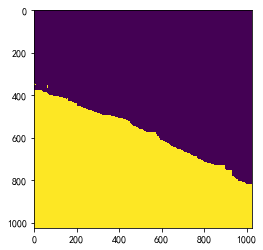

In [20]:
plt.imshow(y_pred_arg_1.numpy()[0])

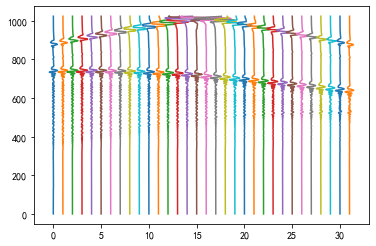

In [26]:
for i in range(32):
    plt.plot(x_test[0][i][::-1]+i,[i for i in range(1024)])
  

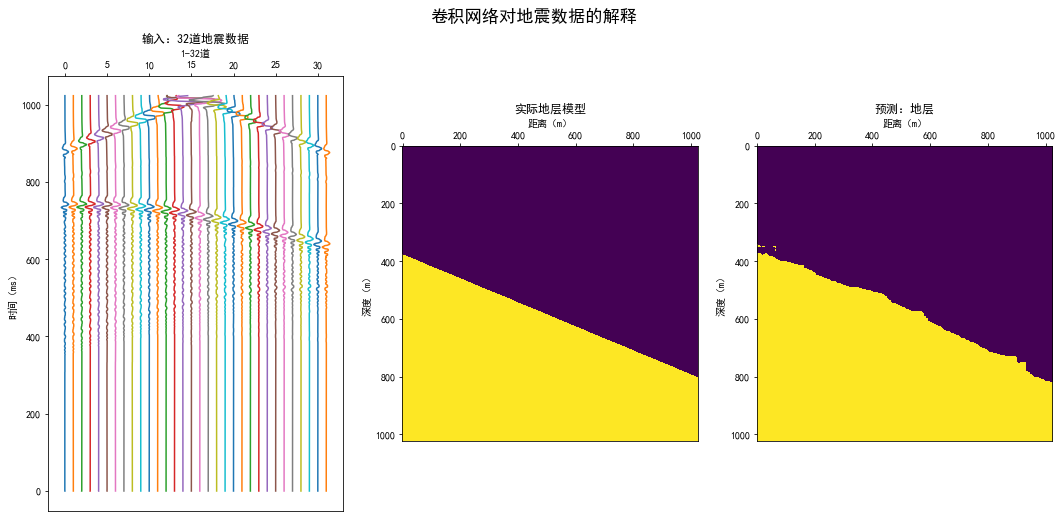

In [41]:
plt.figure(figsize=(18,8))
plt.suptitle('卷积网络对地震数据的解释',y=1,fontsize='xx-large')
plt.subplot(1, 3, 1)
plt.title("输入：32道地震数据")
plt.ylabel("时间（ms）")
plt.xlabel("1-32道")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
for i in range(32):
    plt.rcParams['figure.figsize'] = (1.0, 1.0)
    plt.plot(x_test[0][i][::-1]+i,[i for i in range(1024)])
plt.subplot(1, 3, 2)
plt.title("实际地层模型")
plt.ylabel("深度（m）")
plt.xlabel("距离（m）")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(y_test[0])
plt.subplot(1, 3, 3)
plt.title("输出：预测地层")
plt.ylabel("深度（m）")
plt.xlabel("距离（m）")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(y_pred_arg_1.numpy()[0])
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络对地震数据的解释.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

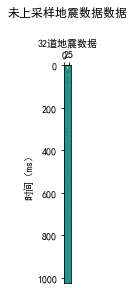

In [35]:
plt.title("未上采样地震数据数据",y=1.2)
plt.ylabel("时间（ms）")
plt.xlabel("32道地震数据")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(x_test[0].T)
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络\未上采样地震数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

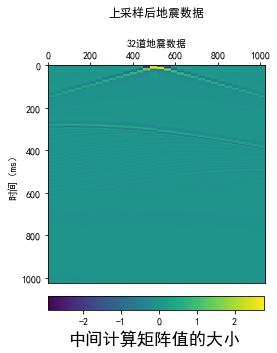

In [86]:
plt.title("上采样后地震数据",y=1.2)
plt.ylabel("时间（ms）")
plt.xlabel("32道地震数据")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(x[0,:,:,0])
cax = plt.axes([0.26,0.03,0.5,0.05])
cbar = plt.colorbar(cax=cax,orientation='horizontal')
cbar.set_label('中间计算矩阵值的大小',fontsize='xx-large')
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络\上采样后地震数据.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [ ]:
x1,x2,x3,x4,x5,x7,x8,x9,x10,x11,x12,x13

In [70]:
x13[0,:,:,3]

<tf.Tensor: id=1988, shape=(512, 512), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        7.7217946 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.8936574 , 3.4738011 , 3.3114214 , ..., 0.        , 0.        ,
        0.        ],
       [2.986869  , 3.821408  , 4.070226  , ..., 0.17554024, 0.09675206,
        0.        ],
       [1.9152308 , 2.7030263 , 3.1885672 , ..., 0.2656041 , 0.11993086,
        0.        ]], dtype=float32)>

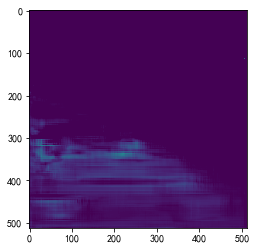

In [69]:
plt.imshow(x13[0,:,:,3])

In [83]:
tf.reduce_max(x1[0,:,:,1])

<tf.Tensor: id=2040, shape=(), dtype=float32, numpy=2.6781414>

In [210]:
y_pred_1.shape

TensorShape([4, 1024, 1024, 2])

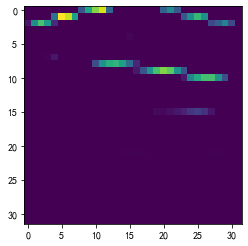

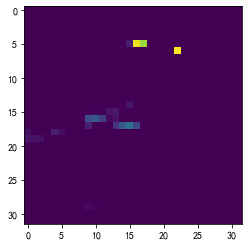

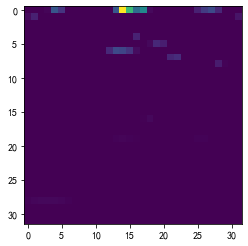

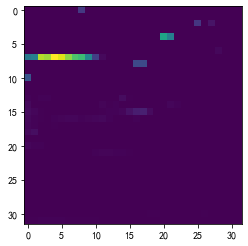

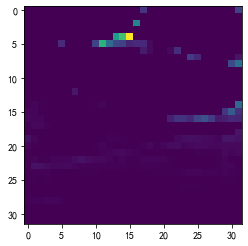

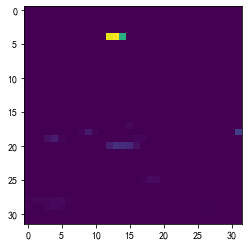

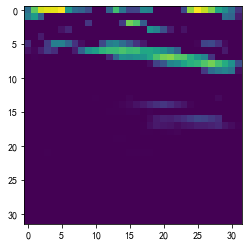

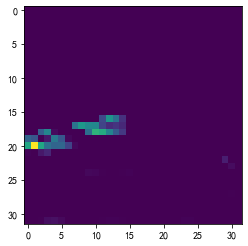

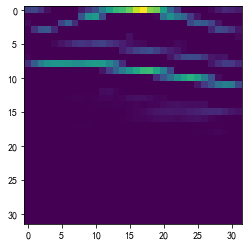

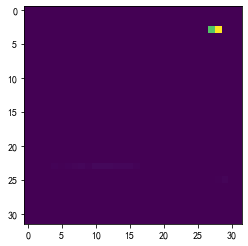

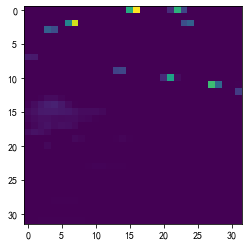

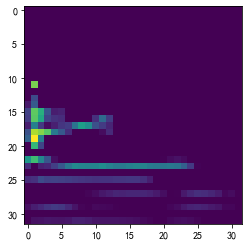

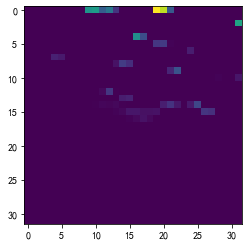

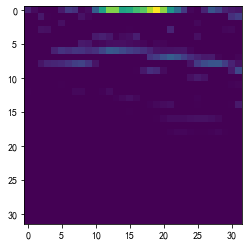

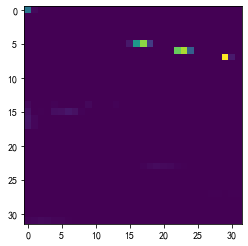

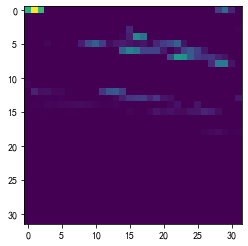

In [217]:
for i in range(16):
    plt.imshow(x9[0,:,:,16+i])
    plt.show()

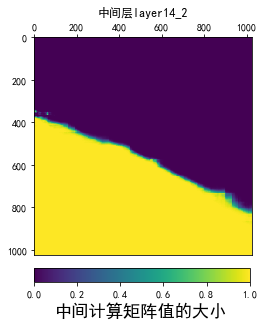

In [214]:
plt.title("中间层layer14_2")
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.imshow(y_pred_1[0,:,:,1])
cax = plt.axes([0.26,0.03,0.5,0.05])
cbar = plt.colorbar(cax=cax,orientation='horizontal')
cbar.set_label('中间计算矩阵值的大小',fontsize='xx-large')
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络\中间层layer14_2.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [215]:
x1.shape

TensorShape([4, 512, 512, 8])

In [248]:
no_zeros = tf.reduce_mean(tf.where(x9[0,:,:,:]==0.,0.,1.),axis=(0,1))

In [254]:
no_zeros_x = tf.reduce_mean(tf.where(x[0,:,:,:]==0.,0.,1.))
no_zeros_x1 = tf.reduce_mean(tf.where(x1[0,:,:,:]==0.,0.,1.))
no_zeros_x2 = tf.reduce_mean(tf.where(x2[0,:,:,:]==0.,0.,1.))
no_zeros_x3 = tf.reduce_mean(tf.where(x3[0,:,:,:]==0.,0.,1.))
no_zeros_x4 = tf.reduce_mean(tf.where(x4[0,:,:,:]==0.,0.,1.))
no_zeros_x5 = tf.reduce_mean(tf.where(x5[0,:,:,:]==0.,0.,1.))
# no_zeros_x6 = tf.reduce_mean(tf.where(x6[0,:,:,:]==0.,0.,1.))
no_zeros_x7 = tf.reduce_mean(tf.where(x7[0,:,:,:]==0.,0.,1.))
no_zeros_x8 = tf.reduce_mean(tf.where(x8[0,:,:,:]==0.,0.,1.))
no_zeros_x9 = tf.reduce_mean(tf.where(x9[0,:,:,:]==0.,0.,1.))
no_zeros_x10 = tf.reduce_mean(tf.where(x10[0,:,:,:]==0.,0.,1.))
no_zeros_x11 = tf.reduce_mean(tf.where(x11[0,:,:,:]==0.,0.,1.))
no_zeros_x12 = tf.reduce_mean(tf.where(x12[0,:,:,:]==0.,0.,1.))
no_zeros_x13 = tf.reduce_mean(tf.where(x13[0,:,:,:]==0.,0.,1.))
no_zeros_x14 = tf.reduce_mean(tf.where(y_pred_1[0,:,:,:]==0.,0.,1.))

In [255]:
no_zeros = [no_zeros_x,no_zeros_x1,no_zeros_x2,no_zeros_x3,no_zeros_x4,no_zeros_x5,no_zeros_x7,no_zeros_x8,
            no_zeros_x9,no_zeros_x10,no_zeros_x11,no_zeros_x12,no_zeros_x13,no_zeros_x14]

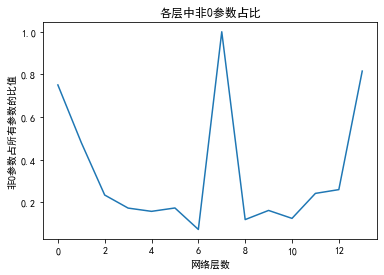

In [266]:
plt.title("各层中非0参数占比")
plt.ylabel("非0参数占所有参数的比值")
plt.xlabel("网络层数")
plt.plot([i for i in range(14)],no_zeros)
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络\各层中非0参数占比.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [3]:
dev_loss = np.loadtxt(r'E:\stuCode\diqiuData\npData\data1024\data3\loss2\dev_loss.txt')
train_loss = np.loadtxt(r'E:\stuCode\diqiuData\npData\data1024\data3\loss2\train_loss.txt')

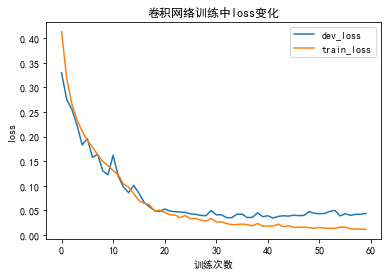

In [4]:
plt.title("卷积网络训练中loss变化")
plt.ylabel("loss")
plt.xlabel("训练次数")
# plt.xticks([0,10,20,30,40,50,60],[0,100,200,300,400,500,600])
plt.plot([i for i in range(60)],dev_loss,label='dev_loss')
plt.plot([i for i in range(60)],train_loss,label='train_loss')
plt.legend()
plt.savefig(r'E:\tools\写论文\图表数据\卷积网络\卷积网络训练中loss变化.jpg',bbox_inches='tight',dpi=300,pad_inches=0.5)

In [8]:
dev_loss[-1:-10:-1]

array([0.04401046, 0.04235543, 0.04213688, 0.04016423, 0.04346113,
       0.03891899, 0.05010939, 0.04800242, 0.04400932])

In [281]:
x_test.shape,y_test.shape

((173, 32, 1024), (173, 1024, 1024))

In [10]:
x_test = tf.cast(x_test, dtype=tf.float32)
x_test = tf.transpose(x_test,[0,2,1])
x_test = tf.reshape(x_test,(173,1024,32,1))

In [11]:
y_test_16 = tf.cast(y_test[0:16], dtype=tf.float32)

In [12]:
y_pred = model(x_test[0:16])

In [13]:
y_pred[0].shape

TensorShape([16, 1024, 1024, 2])

In [13]:
y_pred_layer = tf.argmax(y_pred[0],axis=-1)

In [16]:
y_d = y_pred_layer - y_test[0:16]

In [18]:
tf.reduce_mean(tf.where(y_d==0,1.,0.))

<tf.Tensor: id=979, shape=(), dtype=float32, numpy=0.9878673>

In [14]:
y_add = y_pred_layer + y_test[0:16]

In [15]:
tp = tf.reduce_sum(tf.where(y_add==2,1.,0.))

In [16]:
all_1 = tf.reduce_sum(y_test_16)

In [17]:
all_1

<tf.Tensor: id=978, shape=(), dtype=float32, numpy=8485888.0>

In [18]:
tn = all_1 - tp

In [19]:
fn = tf.reduce_sum(tf.where(y_add==0,1.,0.))

In [20]:
all_0 = tf.reduce_sum(tf.where(y_test_16==0,1.,0.))

In [21]:
fp = all_0 - fn

In [23]:
tp.numpy(),tn.numpy(),fn.numpy(),fp.numpy()

(8416599.0, 69289.0, 8157064.0, 134264.0)

In [24]:
(tp + fn)/(16*1024*1024)

<tf.Tensor: id=997, shape=(), dtype=float32, numpy=0.9878673>